#  0 Introduction

The _Iris Dataset_ is a multivariate data set introduced by Ronald Fisher in his 1936 paper _The use of multiple measurements in taxonomic problems_ as an example of linear discriminant analysis. The dataset contains a set of 150 records under five attributes:
- **Sepal length** 
- **Sepal width**
- **Petal length**
- **Petal width**
- **Species**: _L. setosa_, _L. versicolor_ and _L. virginica_

The 3 species are the classes we want to eventually assign an iris to. There are 50 sample/class. If you need further documentation about the iris dataset is reported [here](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

In this project I will test different models on raw data, on MinMax-rescaled data, on Normalized data and on Standardize data.

# 1 Modules and Dataset

In [1]:
### --- Importing modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

These libraries are both useful on the computational and on the visualization side of the project. We need to process and visualize data in the best possible manner. 

In [2]:
### --- Importing the dataset
from sklearn.datasets import load_iris
load_iris

<function sklearn.datasets._base.load_iris(*, return_X_y=False, as_frame=False)>

More details of _load_iris_ can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris). The dataset instead of having the name of the species as _target_ attribute has them already labelled with numbers ranging from 0 to 2:
- **0** --- _Iris setosa_
- **1** --- _Iris versicolor_
- **2** --- _Iris virginica_

I will now transform the imported dataset in a pandas dataframe to ease its handling. 

In [3]:
### --- We firstly create a dataframe w/o classes to use it later on
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

### --- Secondly we create the total dataframe including the classes
df_tot = pd.DataFrame(iris.data, columns = iris.feature_names)
df_tot['Class'] = iris.target

df_tot.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#  2 Data Exploration and Visualization

In [4]:
### --- Checking the shape of the dataframe and the data types is fill with
s = df_tot.shape
t = df_tot.dtypes
print('There are', s[0], 'rows and', s[1], 'columns.')
print(t)

There are 150 rows and 5 columns.
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Class                  int64
dtype: object


In [5]:
### --- Checking whether the dataframe contains null values or not
null = df_tot.isnull().sum()
null

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Class                0
dtype: int64

In [6]:
### --- Checking the classes' names
classes_names = iris.target_names
print('The species corresponding to the classes 0, 1 and 2 are', classes_names[0] + ', ' + classes_names[1] + ' and ' + classes_names[2],'respectively.')

The species corresponding to the classes 0, 1 and 2 are setosa, versicolor and virginica respectively.


So we take note there are no null values within our dataset and that they all are floating point numbers but Classes which are integers ranging from 0 to 2. 

In [7]:
### --- Checking if the classes are actually evenly present
df_tot['Class'].value_counts()

0    50
1    50
2    50
Name: Class, dtype: int64

In [8]:
### --- Setting pandas display options
pd.set_option('precision', 3)
pd.set_option('display.width', 300)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 5)

In [9]:
### --- Now we will have a look to the descriptive statistics of our dataset
description = iris_df.describe()
description

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [10]:
### --- Checking the skeweness of our attributes
skew = iris_df.skew()
skew

sepal length (cm)    0.315
sepal width (cm)     0.319
petal length (cm)   -0.275
petal width (cm)    -0.103
dtype: float64

In [11]:
### --- Probably there's no point of doing it for these few classes but it could've been useful in case of more
fairly_symm = 0
for i in skew:
    if abs(i) < 0.5:
        fairly_symm += 1
if fairly_symm == 4:
    print('All features are fairly symmetrical.')
else:
    print('There are', fairly_symm, 'fairly symmetrical features out of 4')


All features are fairly symmetrical.


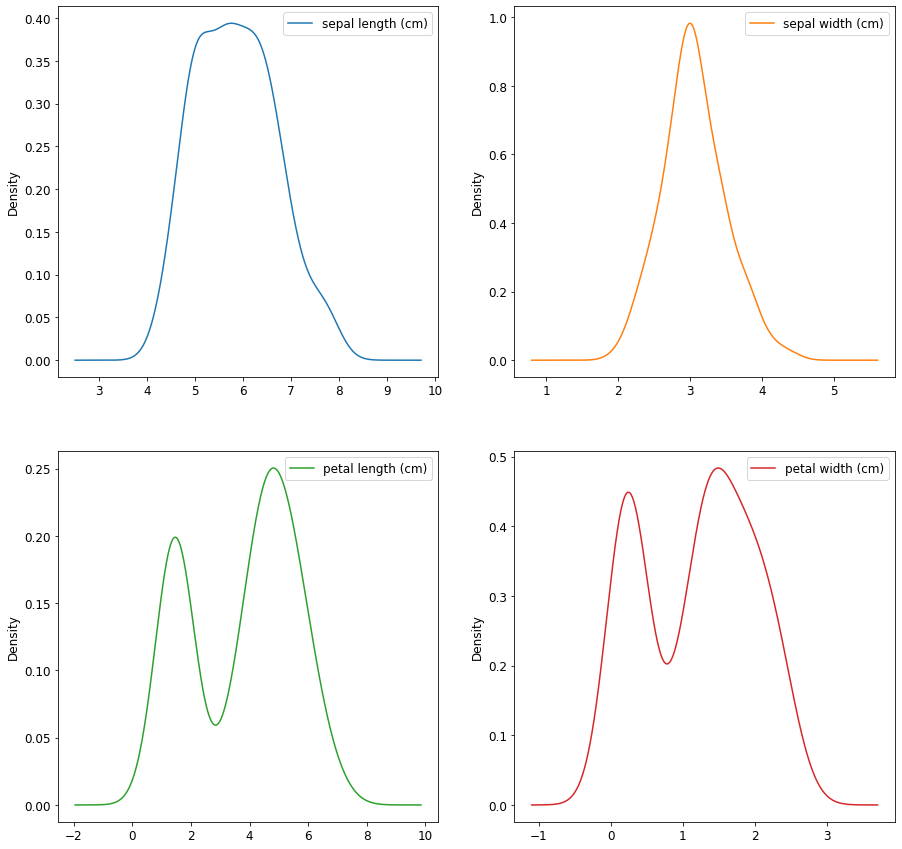

In [12]:
### --- Visualize them to see if they actually are fairly symmetrical and/or even normally distributed
plt.rcParams['figure.figsize'] = [15,15] # setting figure size
plt.rcParams.update({'font.size': 12}) # setting font size within figure
iris_df.plot(kind='density', subplots=True, layout=(2,2), sharex=False)
plt.show()

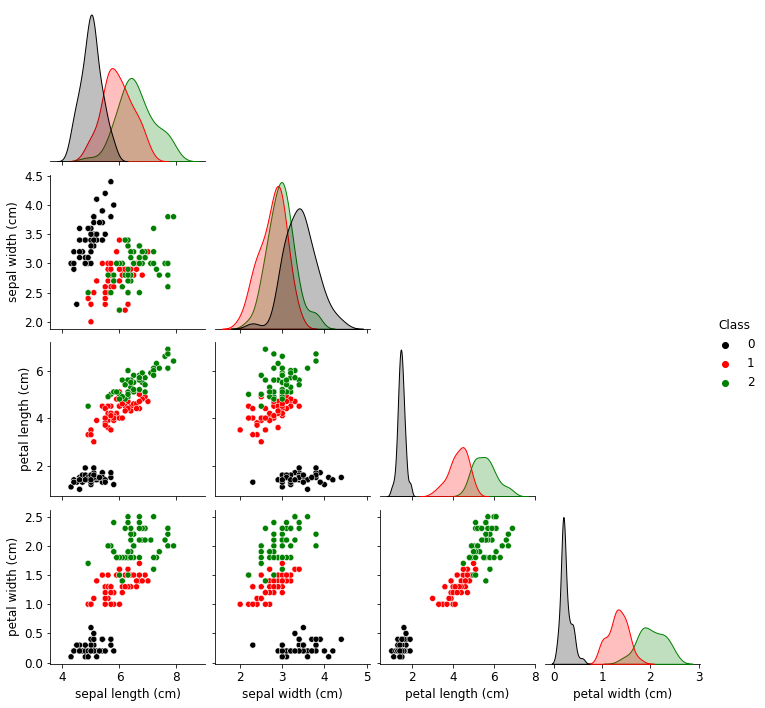

In [13]:
### --- Visualize the pairwise relationship within the dataset
sns.pairplot(df_tot, hue = 'Class', palette = ['black', 'red', 'green'], corner = True)

We can see how the class 0 (_setosa_) is linearly separable from the other two. 

In [14]:
### --- Building the correlation matrix 
corr = iris_df.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000,-0.118,0.872,0.818
sepal width (cm),-0.118,1.000,-0.428,-0.366
petal length (cm),0.872,-0.428,1.000,0.963
petal width (cm),0.818,-0.366,0.963,1.000


<AxesSubplot:>

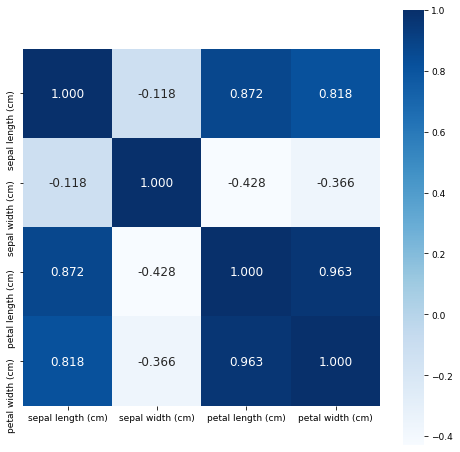

In [15]:
### --- Let's visualize it
plt.figure(figsize = (8,8))
plt.rcParams.update({'font.size': 9}) 
sns.heatmap(corr, cbar = True, square = True, fmt='.3f', annot=True, annot_kws={'size':12}, cmap='Blues')

Based on this result I can clearly see how highly correlated are _petal length_ and _petal width_ or even _petal length_ and _sepal length_ or _sepal length_ and _petal width_. In a larger database with more attributes we should probably drop one of them, e.g. the one being less correlated with the class.

However this is not the case, being the dataset so small and so poor of attributes we will keep them all for now and we will choose the best 3 to keep and to train our model on with the next steps.

<AxesSubplot:>

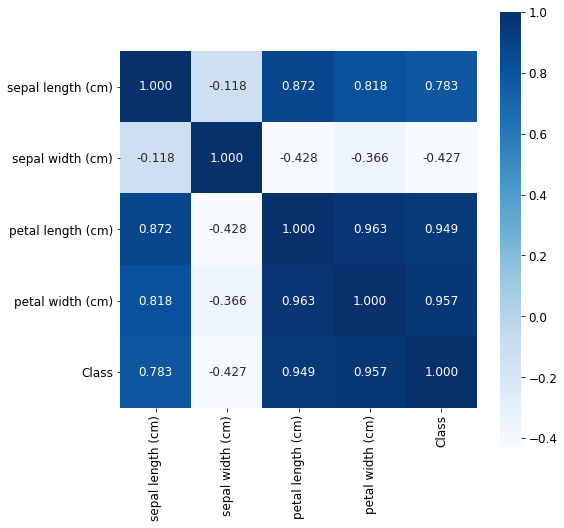

In [16]:
### --- Visualizing the correlation matrix with the Class
tot_corr = df_tot.corr()
plt.figure(figsize = (8,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(tot_corr, cbar = True, square = True, fmt='.3f', annot=True, annot_kws={'size':12}, cmap='Blues')

As we can see from these correlation matrix _petal width_, _petal length_ and _sepal length_ are the 3 most correlated values with _Class_. 

# 3 Data Rescaling, Normalization and Standardization 

In [17]:
### --- Storing raw data in a variable X and the Classes in a variable Y
X = iris_df.values
Y = iris.target

np.set_printoptions(precision=3)
print(X.shape, Y.shape)
print(X[0:10, :])

(150, 4) (150,)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


### 3.1 Rescaling 

In [18]:
### --- Importing the module we will use to rescale data
from sklearn.preprocessing import MinMaxScaler

In [19]:
### --- Applying MinMaxScaler to rescale data
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
rescaled_X = scaler.transform(X)

### --- Checking if all went as expected
np.set_printoptions(precision = 3)
print(rescaled_X[0:10,:])
print('Minmum: %.3f' % (rescaled_X.min()))
print('Maximum: %.3f' % (rescaled_X.max()))

[[0.222 0.625 0.068 0.042]
 [0.167 0.417 0.068 0.042]
 [0.111 0.5   0.051 0.042]
 [0.083 0.458 0.085 0.042]
 [0.194 0.667 0.068 0.042]
 [0.306 0.792 0.119 0.125]
 [0.083 0.583 0.068 0.083]
 [0.194 0.583 0.085 0.042]
 [0.028 0.375 0.068 0.042]
 [0.167 0.458 0.085 0.   ]]
Minmum: 0.000
Maximum: 1.000


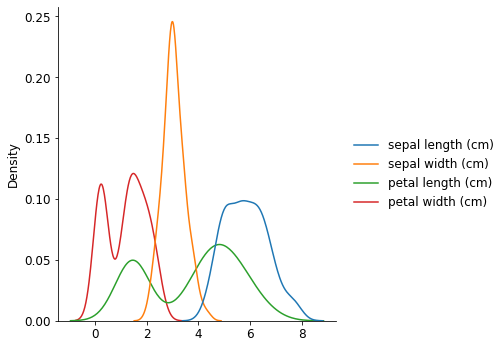

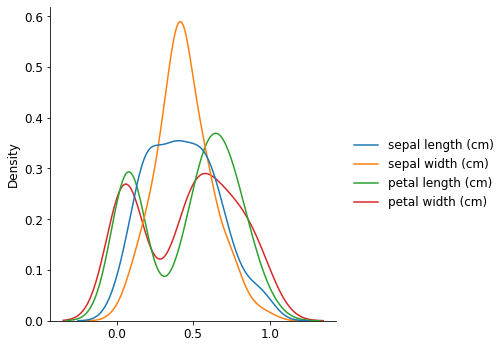

In [20]:
### --- Raw data distribution vs Rescaled data distribution
sns.displot(iris_df, kind = 'kde')
sns.displot(pd.DataFrame(rescaled_X, columns=iris.feature_names), kind='kde')

MinMaxScaler preserves the shape of the original distribution. It does not reduce the weight of outliers.

### 3.2 Normalizing

In [21]:
### --- Importing the module we will use to normalize data
from sklearn.preprocessing import Normalizer

In [22]:
### --- Applying Normalizer to normalize data using the default l2-norm or least squares
normalizer = Normalizer().fit(X)
norm_X = normalizer.transform(X)

### --- Checking if all went as expected
np.set_printoptions(precision=3)
print(norm_X[0:10,:])
print('Minmum: %.3f' % (norm_X.min()))
print('Maximum: %.3f' % (norm_X.max()))

[[0.804 0.552 0.221 0.032]
 [0.828 0.507 0.237 0.034]
 [0.805 0.548 0.223 0.034]
 [0.8   0.539 0.261 0.035]
 [0.791 0.569 0.221 0.032]
 [0.784 0.566 0.247 0.058]
 [0.78  0.577 0.237 0.051]
 [0.802 0.545 0.241 0.032]
 [0.806 0.532 0.257 0.037]
 [0.818 0.518 0.25  0.017]]
Minmum: 0.015
Maximum: 0.861


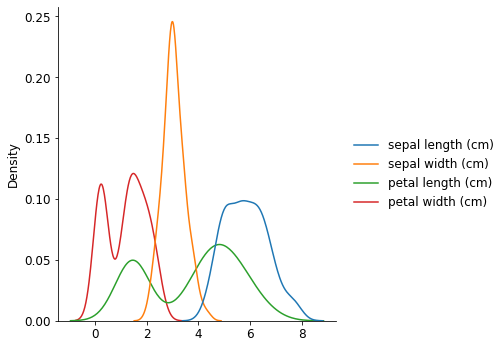

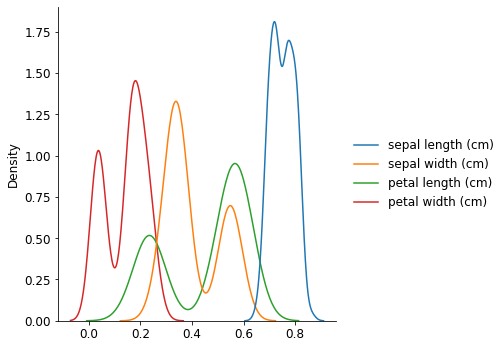

In [23]:
### --- Raw data distribution vs Normalized data distribution
sns.displot(iris_df, kind = 'kde')
sns.displot(pd.DataFrame(norm_X, columns=iris.feature_names), kind='kde')

Normalizer as we can see works on rows, it is the row that has been normalized to the length of 1. Taking the first elements (0.804 0.552 0.221 0.032), squaring them and summing them up we obtain roughly 1. 

### 3.3 Standardizing

In [24]:
### --- Importing the module we will use to standardize data
from sklearn.preprocessing import StandardScaler

In [25]:
### --- Standardizing the data: setting the mean at 0 and sd at 1
standardizer = StandardScaler().fit(X)
stand_X = standardizer.transform(X)

### --- Checking if all went as expected
np.set_printoptions(precision=3)
print(stand_X[0:10,:])
print('Mean: %.3f' % (stand_X.mean()))
print('Standard Deviation: %.3f' % (stand_X.std()))

[[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]
 [-0.537  1.94  -1.17  -1.052]
 [-1.507  0.789 -1.34  -1.184]
 [-1.022  0.789 -1.283 -1.315]
 [-1.749 -0.362 -1.34  -1.315]
 [-1.143  0.098 -1.283 -1.447]]
Mean: -0.000
Standard Deviation: 1.000


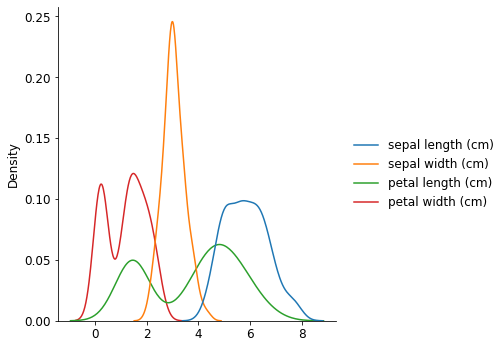

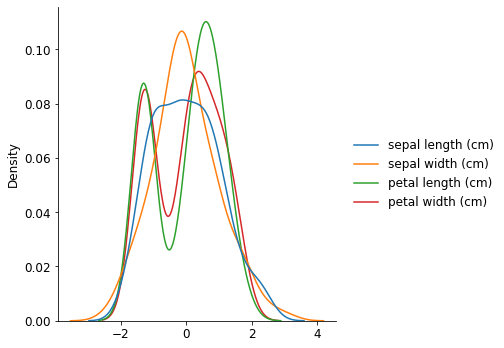

In [26]:
### --- Raw data distribution vs Standardize data distribution
sns.displot(iris_df, kind='kde')
sns.displot(pd.DataFrame(stand_X, columns=iris.feature_names), kind = 'kde')

# 4 Feature Selection

I decided to select the best 3 features describing the dataset.

In [27]:
### --- Importing the modules we will exploit for feature selection
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

## 4.1 Raw Data

In [28]:
### --- Feature selection using SelectKBest. I use chi2 which is fit for non-negative values
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X,Y)
print(fit.scores_)
iris.feature_names

[ 10.818   3.711 116.313  67.048]


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The 3 best ones are _sepal length_, _petal length_ and _petal width_.

In [29]:
### --- Feature selection exploiting RFE
model = LogisticRegression(solver = 'lbfgs', max_iter = 500)
rfe = RFE(model, n_features_to_select=3)    # my choice: seek for 3 features
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
iris.feature_names

Num Features: 3
Selected Features: [False  True  True  True]
Feature Ranking: [2 1 1 1]


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The best 3 ones in this case are _sepal width_, _petal length_ and _petal width_.

In [30]:
### --- Feature selection using ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)
iris.feature_names

[0.1   0.057 0.388 0.455]


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The best 3 ones in this case are still _sepal length_, _petal length_ and _petal width_.

Eventually using the raw data as input I will select _sepal length_, _petal length_ and _petal width_ since they are the 3 more recurrent. 

In [31]:
### --- Building the input raw data for the modelling part
X_new = iris_df.drop(columns =['sepal width (cm)']).to_numpy()
print(X[:10,:])
print(X_new[:10,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]
 [5.4 1.7 0.4]
 [4.6 1.4 0.3]
 [5.  1.5 0.2]
 [4.4 1.4 0.2]
 [4.9 1.5 0.1]]


## 4.2 Rescaled Data 

In [32]:
### --- Feature importance using SelectKBest. I use chi2 which is fit for non-negative values
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(rescaled_X,Y)
print(fit.scores_)
iris.feature_names

[11.377  4.471 26.862 30.478]


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [33]:
### --- Feature selection exploiting RFE
model = LogisticRegression(solver = 'lbfgs', max_iter = 500)
rfe = RFE(model, n_features_to_select=3)    # my choice: seek for 3 features
fit = rfe.fit(rescaled_X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
iris.feature_names

Num Features: 3
Selected Features: [False  True  True  True]
Feature Ranking: [2 1 1 1]


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
### --- Feature selection using ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(rescaled_X, Y)
print(model.feature_importances_)
iris.feature_names

[0.088 0.06  0.444 0.407]


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

With the rescaled data I will use the same features chosen for the raw data, discarding only _sepal width_.

In [35]:
### --- Building the input rescaled data for the modelling part
X_new_rescaled = np.delete(rescaled_X, [1], axis=1)
print(rescaled_X[:10,:])
print(X_new_rescaled[:10,:])

[[0.222 0.625 0.068 0.042]
 [0.167 0.417 0.068 0.042]
 [0.111 0.5   0.051 0.042]
 [0.083 0.458 0.085 0.042]
 [0.194 0.667 0.068 0.042]
 [0.306 0.792 0.119 0.125]
 [0.083 0.583 0.068 0.083]
 [0.194 0.583 0.085 0.042]
 [0.028 0.375 0.068 0.042]
 [0.167 0.458 0.085 0.   ]]
[[0.222 0.068 0.042]
 [0.167 0.068 0.042]
 [0.111 0.051 0.042]
 [0.083 0.085 0.042]
 [0.194 0.068 0.042]
 [0.306 0.119 0.125]
 [0.083 0.068 0.083]
 [0.194 0.085 0.042]
 [0.028 0.068 0.042]
 [0.167 0.085 0.   ]]


## 4.3 Normalized Data 

In [36]:
### --- Feature importance using SelectKBest. I use chi2 which is fit for non-negative values
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(norm_X,Y)
print(fit.scores_)
iris.feature_names

[0.312 3.795 8.191 5.972]


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [37]:
### --- Feature selection exploiting RFE
model = LogisticRegression(solver = 'lbfgs', max_iter = 500)
rfe = RFE(model,n_features_to_select= 3)    # my choice: seek for 3 features
fit = rfe.fit(norm_X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
iris.feature_names

Num Features: 3
Selected Features: [False  True  True  True]
Feature Ranking: [2 1 1 1]


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
### --- Feature selection using ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(norm_X, Y)
print(model.feature_importances_)
iris.feature_names

[0.168 0.227 0.294 0.312]


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

With the normalized data I noticed the feature to discard seems to be _sepal length_.

In [39]:
### --- Building the input normalized data for the modelling part
X_new_norm = np.delete(norm_X, [0], axis=1)
print(norm_X[:10,:])
print(X_new_norm[:10,:])

[[0.804 0.552 0.221 0.032]
 [0.828 0.507 0.237 0.034]
 [0.805 0.548 0.223 0.034]
 [0.8   0.539 0.261 0.035]
 [0.791 0.569 0.221 0.032]
 [0.784 0.566 0.247 0.058]
 [0.78  0.577 0.237 0.051]
 [0.802 0.545 0.241 0.032]
 [0.806 0.532 0.257 0.037]
 [0.818 0.518 0.25  0.017]]
[[0.552 0.221 0.032]
 [0.507 0.237 0.034]
 [0.548 0.223 0.034]
 [0.539 0.261 0.035]
 [0.569 0.221 0.032]
 [0.566 0.247 0.058]
 [0.577 0.237 0.051]
 [0.545 0.241 0.032]
 [0.532 0.257 0.037]
 [0.518 0.25  0.017]]


## 4.4 Standardized Data

Since using the chi2 function with negative values cannot be done I decided to exploit the _f\_classif_ function (ANOVA). 

In [40]:
from sklearn.feature_selection import f_classif

In [41]:
### --- Feature importance using SelectKBest. I use f_classif which works with negative values
test = SelectKBest(score_func=f_classif, k=3)
fit = test.fit(stand_X,Y)
print(fit.scores_)
iris.feature_names

[ 119.265   49.16  1180.161  960.007]


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [42]:
### --- Feature selection exploiting RFE
model = LogisticRegression(solver = 'lbfgs', max_iter = 500)
rfe = RFE(model, n_features_to_select=3)    # my choice: seek for 3 features
fit = rfe.fit(stand_X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
iris.feature_names

Num Features: 3
Selected Features: [False  True  True  True]
Feature Ranking: [2 1 1 1]


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [43]:
### --- Feature selection using ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(stand_X, Y)
print(model.feature_importances_)
iris.feature_names

[0.097 0.052 0.392 0.459]


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Even with standardized data we need to discard _sepal width_.

In [44]:
### --- Building the input standardized data for the modelling part
X_new_stand = np.delete(stand_X, [1], axis = 1)
print(stand_X[:10,:])
print(X_new_stand[:10,:])

[[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]
 [-0.537  1.94  -1.17  -1.052]
 [-1.507  0.789 -1.34  -1.184]
 [-1.022  0.789 -1.283 -1.315]
 [-1.749 -0.362 -1.34  -1.315]
 [-1.143  0.098 -1.283 -1.447]]
[[-0.901 -1.34  -1.315]
 [-1.143 -1.34  -1.315]
 [-1.385 -1.397 -1.315]
 [-1.507 -1.283 -1.315]
 [-1.022 -1.34  -1.315]
 [-0.537 -1.17  -1.052]
 [-1.507 -1.34  -1.184]
 [-1.022 -1.283 -1.315]
 [-1.749 -1.34  -1.315]
 [-1.143 -1.283 -1.447]]


# 5 Modelling evaluation

In [45]:
### --- Import the libraries needed to evaluate the quality of the models
from sklearn.model_selection import cross_val_score

In [46]:
scores = ['accuracy', 'neg_log_loss'] 
names = ['Accuracy', 'Negative Log Loss']

To evaluate the performance I use:
- **Accuracy**: the nearer to 1 the better is the result.
- **Negative Log Loss**: In this case the closer to 0 the better it is.  

## 5.1 Modelling on Raw Data

### 5.1.1 Logistic Regression

The Logistic Regression (LR) uses a logistic function to model a dependent variable. More information on how the one implented in sklearn.linear_model works are reported [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

I already imported this model within the Feature Selection section. 

#### 5.1.1.1 Splitting in training and testing dataset

In [47]:
### --- Importing the modules to split the training set
from sklearn.model_selection import train_test_split

In [48]:
### --- Try train_test_split with different seeds and different testing set size
### --- I will use the already imported LogisticRegression model 
test_size = [0.20, 0.25, 0.30]
seed = [i for i in range(1,11)]
accuracy_20=[]
accuracy_25=[]
accuracy_30=[]
for t in test_size:
    for s in seed:
        X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=t, random_state=s)
        model = LogisticRegression(solver='lbfgs', max_iter=500)
        model.fit(X_train, Y_train)             
        result = model.score(X_test, Y_test)   
        if t == 0.20:
            accuracy_20.append(result)
        elif t == 0.25:
            accuracy_25.append(result)
        else:
            accuracy_30.append(result)
        print("Seed %2d - Test size %.2f%% - Accuracy: %.3f%%" % (s, t*100, result*100))

Seed  1 - Test size 20.00% - Accuracy: 96.667%
Seed  2 - Test size 20.00% - Accuracy: 96.667%
Seed  3 - Test size 20.00% - Accuracy: 100.000%
Seed  4 - Test size 20.00% - Accuracy: 96.667%
Seed  5 - Test size 20.00% - Accuracy: 96.667%
Seed  6 - Test size 20.00% - Accuracy: 96.667%
Seed  7 - Test size 20.00% - Accuracy: 86.667%
Seed  8 - Test size 20.00% - Accuracy: 90.000%
Seed  9 - Test size 20.00% - Accuracy: 100.000%
Seed 10 - Test size 20.00% - Accuracy: 100.000%
Seed  1 - Test size 25.00% - Accuracy: 97.368%
Seed  2 - Test size 25.00% - Accuracy: 97.368%
Seed  3 - Test size 25.00% - Accuracy: 97.368%
Seed  4 - Test size 25.00% - Accuracy: 97.368%
Seed  5 - Test size 25.00% - Accuracy: 97.368%
Seed  6 - Test size 25.00% - Accuracy: 94.737%
Seed  7 - Test size 25.00% - Accuracy: 89.474%
Seed  8 - Test size 25.00% - Accuracy: 92.105%
Seed  9 - Test size 25.00% - Accuracy: 100.000%
Seed 10 - Test size 25.00% - Accuracy: 100.000%
Seed  1 - Test size 30.00% - Accuracy: 97.778%
Seed  2 

In [49]:
### --- Computing the mean of the accuracy for each of the testing set size
print('Accuracy mean with 80/20 split: %.3f%%' % (np.mean(accuracy_20)*100))
print('Accuracy mean with 75/25 split: %.3f%%' % (np.mean(accuracy_25)*100))
print('Accuracy mean with 70/30 split: %.3f%%' % (np.mean(accuracy_30)*100))

Accuracy mean with 80/20 split: 96.000%
Accuracy mean with 75/25 split: 96.316%
Accuracy mean with 70/30 split: 96.889%


In [50]:
### --- Computing the variance of the accuracy for each of the testing set size
print('Variance with 80/20 split: %.3f%%' % (np.var(accuracy_20)*100))
print('Variance with 75/25 split: %.3f%%' % (np.var(accuracy_25)*100))
print('Variance with 70/30 split: %.3f%%' % (np.var(accuracy_30)*100))

Variance with 80/20 split: 0.173%
Variance with 75/25 split: 0.100%
Variance with 70/30 split: 0.071%


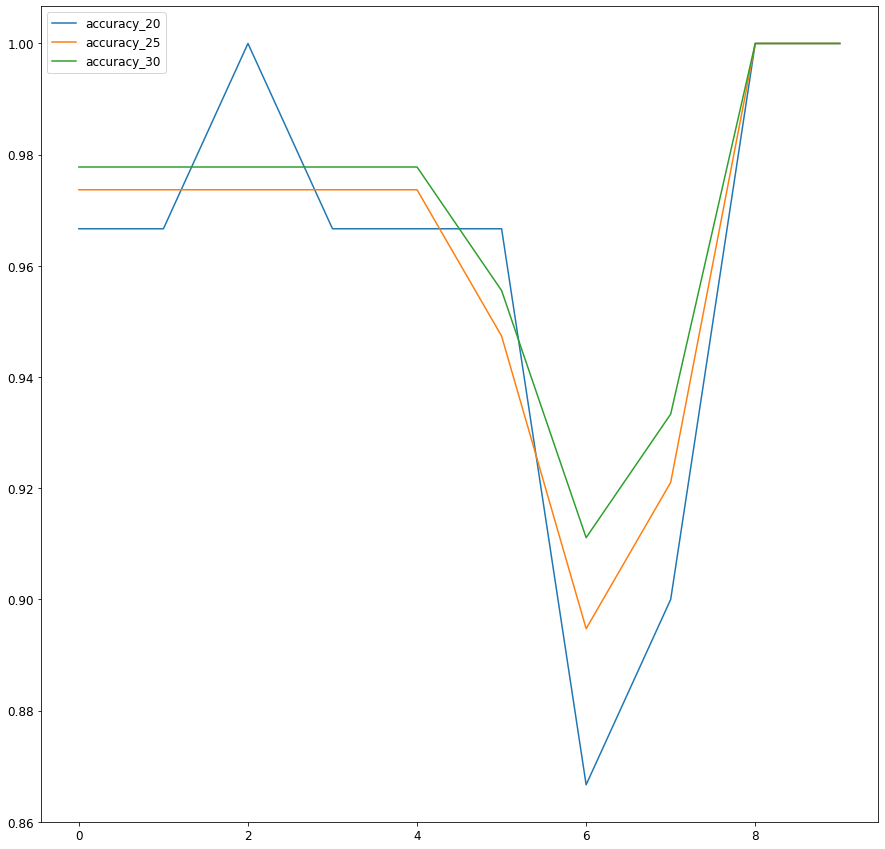

In [51]:
### --- Plotting the values of the accuracy for each testing set size to visualize it
plt.plot(np.array(accuracy_20), label='accuracy_20')
plt.plot(np.array(accuracy_25), label='accuracy_25')
plt.plot(np.array(accuracy_30), label='accuracy_30')
plt.legend()
plt.show()

Based on this analysis I will split the dataset in 30% testing and 70% training with a seed equal to 10. 

However, due to the fact the dataset is so small, a simple split will not guarantee a really useful partition. For this reason I will stick to K-Fold Cross-Validation for the other models. 

#### 5.1.1.2 K-Fold Cross-Validation

Using K-Fold Cross-Validation we will end up with k different performance scores. We will resume them exploiting the mean and the std within numpy.

In [52]:
### --- Importing the function necessary to run K-Fold Cross-Validation
from sklearn.model_selection import KFold

In [53]:
### --- Evaluation using Cross Validation
seed = 10
for n in range(len(scores)):
    for num_folds in range(5,11):
        kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
        model = LogisticRegression(solver='lbfgs', max_iter=500)
        results = cross_val_score(model, X_new, Y, cv=kfold, scoring = scores[n])
        print(names[n], ": %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy : 0.967 (0.021)
Accuracy : 0.960 (0.023)
Accuracy : 0.967 (0.041)
Accuracy : 0.966 (0.046)
Accuracy : 0.967 (0.042)
Accuracy : 0.960 (0.044)
Negative Log Loss : -0.145 (0.012)
Negative Log Loss : -0.142 (0.023)
Negative Log Loss : -0.142 (0.047)
Negative Log Loss : -0.141 (0.040)
Negative Log Loss : -0.138 (0.025)
Negative Log Loss : -0.139 (0.031)


The best k found is 5 despite the fact we obtained fairly similar values.

#### 5.1.1.3 Repeated Random Test-Train Splits

It can be seen as a variant of the K-Fold Cross-Validation method. The difference is the multiple repetition of the process of splitting and evaluation of the algorithm. 

In [54]:
### --- Importing the function necessary to run Repeated Random Test-Train Splits
from sklearn.model_selection import ShuffleSplit 

In [55]:
### --- Evaluation using ShuffleSplit
n_splits = 5
test_size = 0.3

kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='lbfgs', max_iter=500)

for n in range(len(scores)):
    results = cross_val_score(model, X_new, Y, cv=kfold, scoring = scores[n])
    print(names[n], ": %.3f (%.3f)" % (results.mean(), results.std()))


Accuracy : 0.964 (0.030)
Negative Log Loss : -0.147 (0.014)


The result of the ShuffleSplit run are similar to the one obtained with the K-Fold Cross-Validation.

With the other types of models and data I will stick to a 5-Fold Cross-Validation. 

In [56]:
 kfold = KFold(n_splits=5, random_state=seed, shuffle=True)

### 5.1.2 K-Neighbors Classifier and Decision Tree Classifier

The K-Neighbors Classifier (KNN) implements the K-Nearest Neighbors vote, an object is classified by a plurality vote of its neighbors. More documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

The Decision Tree Classifier (DTC) is based on the Decision Tree learning where leaves represent class labels and branches represent conjunctions of features that lead to those class labels. More documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [57]:
### --- Importing the models I will exploit                   
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier                          

In [58]:
### --- Comparing the models
models = [('KNN', KNeighborsClassifier()), ('DTC', DecisionTreeClassifier())]
results = []
model_names = []
scoring = 'accuracy'
for name, model in models:
    for n in range(len(scores)):
        cv_results = cross_val_score(model, X_new, Y, cv=kfold, scoring=scores[n])
        results.append(cv_results)
        model_names.append(name)
        msg = "%s: %.3f (%.3f)" % (name+' '+names[n], cv_results.mean(), cv_results.std())
        print(msg)

KNN Accuracy: 0.960 (0.013)
KNN Negative Log Loss: -0.522 (0.553)
DTC Accuracy: 0.933 (0.021)
DTC Negative Log Loss: -2.303 (0.728)


Based on the result achieved both KNN and LR are good models using raw input data since the accuracy is at least 96%. 

## 5.2 Modelling on Rescaled Data

From now on I will directly compare all the 3 models within one cell. 

In [59]:
### --- Comparing the models
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()), ('DTC', DecisionTreeClassifier())]
results = []
model_names = []
for name, model in models:
    for n in range(len(scores)):
        cv_results = cross_val_score(model, X_new_rescaled, Y, cv=kfold, scoring=scores[n])
        results.append(cv_results)
        model_names.append(name)
        msg = "%s: %.3f (%.3f)" % (name+' '+names[n], cv_results.mean(), cv_results.std())
        print(msg)

LR Accuracy: 0.940 (0.025)
LR Negative Log Loss: -0.408 (0.017)
KNN Accuracy: 0.947 (0.034)
KNN Negative Log Loss: -0.540 (0.558)
DTC Accuracy: 0.933 (0.021)
DTC Negative Log Loss: -2.072 (1.128)


Based on the result achieved all the 3 models works similarly with rescaled input data reaching an accuracy of at least 94%. However, based on the negative log loss I will discard the Classification and Regression Trees among the three. 

## 5.3 Modelling on Normalized Data

In [60]:
### --- Comparing the models
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()), ('DTC', DecisionTreeClassifier())]
results = []
model_names = []
for name, model in models:
    for n in range(len(scores)):
        cv_results = cross_val_score(model, X_new_norm, Y, cv=kfold, scoring=scores[n])
        results.append(cv_results)
        model_names.append(name)
        msg = "%s: %.3f (%.3f)" % (name+ ' '+names[n], cv_results.mean(), cv_results.std())
        print(msg)

LR Accuracy: 0.813 (0.157)
LR Negative Log Loss: -0.656 (0.025)
KNN Accuracy: 0.973 (0.025)
KNN Negative Log Loss: -0.286 (0.465)
DTC Accuracy: 0.953 (0.040)
DTC Negative Log Loss: -1.382 (1.128)


Looking at the performances obtained with normalized input data I will choose as best one the K-NeighborsClassifier reaching an accuracy over 97%. 

## 5.4 Modelling on Standardized Data

In [61]:
### --- Comparing the models
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()), ('DTC', DecisionTreeClassifier())]
results = []
model_names = []
for name, model in models:
    for n in range(len(scores)):
        cv_results = cross_val_score(model, X_new_stand, Y, cv=kfold, scoring=scores[n])
        results.append(cv_results)
        model_names.append(name)
        msg = "%s: %.3f (%.3f)" % (name+' '+names[n], cv_results.mean(), cv_results.std())
        print(msg)

LR Accuracy: 0.960 (0.025)
LR Negative Log Loss: -0.176 (0.025)
KNN Accuracy: 0.947 (0.034)
KNN Negative Log Loss: -0.762 (0.581)
DTC Accuracy: 0.940 (0.033)
DTC Negative Log Loss: -2.303 (0.728)


In case of input standardized data the one achieving the most promising result seems to be LogisticRegression

 So based on this modelling evaluation analysis I retrieved that Logistic Regression and K-Neighbors Classifier are both fairly good models but, seen the performances achieved on normalized data, I will focus on K-Neighbors Classifier trying to improve such performance with the next steps. 

# 6 Improving KNN performances with Parameter Tuning

In [62]:
### --- Importing GridSearchCV to check the best hyperparameters for KNN and storing KNN in a variable
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

In [63]:
### --- Hyperparameters to check
leaf_size = list(range(1,31))    # Leaf size, default value is 30
n_neighbors = list(range(1,11))  # Number of neighbors, default value is 5
p=[1,2]                          # Power parameter for the Minkowski metric, default value is 2
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [64]:
### --- Checking the best result and the values to assign to each hyperparameter to achieve it
GSCV = GridSearchCV(knn, hyperparameters, cv=kfold)
best_model = GSCV.fit(X_new_norm,Y)
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best accuracy:', '%.3f%%' % (best_model.best_score_*100))

Best leaf_size: 1
Best p: 2
Best n_neighbors: 3
Best accuracy: 98.000%


In [65]:
knn_final = KNeighborsClassifier(leaf_size=1, p=2, n_neighbors=3)

Based on this procedure we succeeded on improving the accuracy of our model pushing it to 98% despite it was already really high (~97%). 

# 7 Majority Voting

Despite the accuracy was really satisfying with the KNN model I tried the major voting procedure to see whether the accuracy could have gone even higher or not. 

Major voting is an ensemble procedure used to ideally achieve a better final performance with respect to the performances achieved by the single models. 
In this case I will use hard voting which will predict the class with the largest sum of votes from the models. 

In [66]:
### --- Importing the Voting Classifier 
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [67]:
### --- Collecting the estimators for the further voting
estimators = [('LR',LogisticRegression()),('DTC', DecisionTreeClassifier()),('SVM', SVC()),('KNN', knn_final)]

In [68]:
### --- Creating and checking the result achieved with the ensemble model
ensemble = VotingClassifier(estimators, voting='hard')
results = cross_val_score(ensemble, X_new_norm, Y, cv=kfold)
print('Major voting Accuracy: %.3f%% (%.3f)' % ((results.mean()*100), (results.std()*100)))

Major voting Accuracy: 97.333% (2.494)


# 8. Conclusion

Based on the whole analysis carried on in this project I noticed how roughly all the models trained gave fairly good results (above 90% accuracy). Using K-Neighbors Classifier on normalized data, once performed the grid search to set the best hyperparameters, I obtained an accuracy of 98%. 

The Majority Voting strategy instead lead to an accuracy equal to the one obtained using the K-Neighbors Classifier with the default parameters (97.3%). 